In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from statsmodels.tsa.arima_model import ARIMA

In [2]:
df_avocado = pd.read_csv('Datasets/avocado.csv', parse_dates=['Date'])

In [3]:
df_avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df_avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [5]:
df_avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
df_avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [7]:
df_avocado_organic_chicago = df_avocado[
    (df_avocado['type'] == 'organic')
    & (df_avocado['region'] == 'Chicago')
].sort_values(by='Date')

df_avocado_organic_chicago.head()  

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago
9592,50,2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago
9591,49,2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago
9590,48,2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago
9589,47,2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago


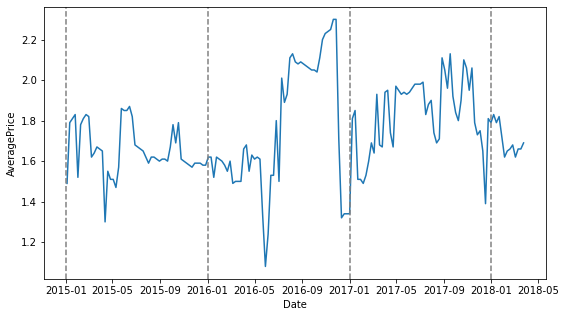

In [8]:
plt.figure(figsize=(9,5))
sns.lineplot(x='Date', y='AveragePrice', data=df_avocado_organic_chicago)
plt.axvline(pd.to_datetime('2015-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2016-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2017-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2018-01'), ls='--', color='grey');

In [9]:
df_avocado_organic_chicago_simple = df_avocado_organic_chicago[['Date', 'AveragePrice']].set_index('Date')
df_avocado_organic_chicago_simple.head()

,AveragePrice
Date,
2015-01-04,1.49
2015-01-11,1.79
2015-01-18,1.81
2015-01-25,1.83
2015-02-01,1.52


In [10]:
df_avocado_organic_chicago_simple['AveragePrice_lag1'] = df_avocado_organic_chicago_simple['AveragePrice'].shift(1)
df_avocado_organic_chicago_simple['AveragePrice_diff1'] = df_avocado_organic_chicago_simple['AveragePrice'] - df_avocado_organic_chicago_simple['AveragePrice_lag1']

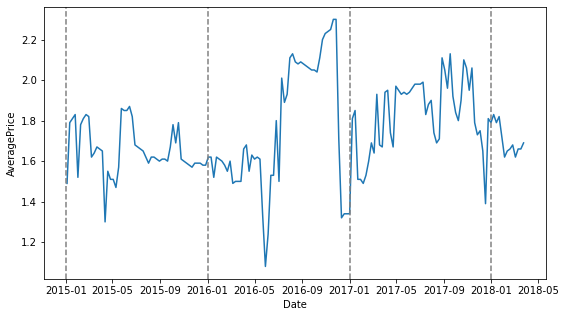

In [21]:
plt.figure(figsize=(9,5))
sns.lineplot(x='Date', y='AveragePrice', data=df_avocado_organic_chicago_simple)
plt.axvline(pd.to_datetime('2015-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2016-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2017-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2018-01'), ls='--', color='grey');

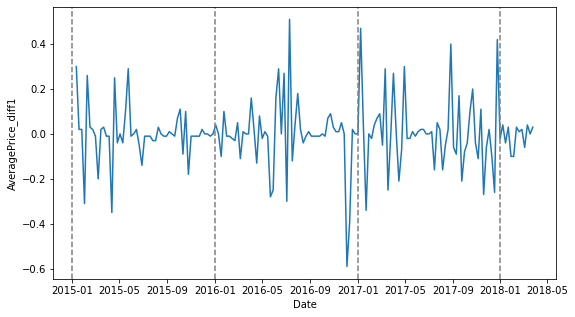

In [22]:
plt.figure(figsize=(9,5))
sns.lineplot(x='Date', y='AveragePrice_diff1', data=df_avocado_organic_chicago_simple)
plt.axvline(pd.to_datetime('2015-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2016-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2017-01'), ls='--', color='grey')
plt.axvline(pd.to_datetime('2018-01'), ls='--', color='grey');

In [12]:
train_set = df_avocado_organic_chicago_simple[df_avocado_organic_chicago_simple.index.year < 2017]
val_set = df_avocado_organic_chicago_simple[df_avocado_organic_chicago_simple.index.year == 2017]
test_set = df_avocado_organic_chicago_simple[df_avocado_organic_chicago_simple.index.year > 2017]

time_train, X_train = train_set.index.values, train_set['AveragePrice'].values
time_val, X_val = val_set.index.values, val_set['AveragePrice'].values
time_test, X_test = test_set.index.values, test_set['AveragePrice'].values

In [13]:
window_size = 20 
batch_size = 32
shuffle_buffer_size = 1000

dataset = tf.data.Dataset.from_tensor_slices(X_train)
dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
dataset = dataset.shuffle(shuffle_buffer_size).map(lambda window: (window[:-1], window[-1]))
dataset = dataset.batch(batch_size).prefetch(1)
dataset

Metal device set to: Apple M1


2022-01-02 16:04:50.131595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-02 16:04:50.131881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float64, tf.float64)>

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          8704      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(
    loss=tf.keras.losses.Huber(),
     optimizer='sgd', metrics=['mae'])
history = model.fit(
    dataset, epochs=100
)

2022-01-02 16:13:27.690620: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-02 16:13:27.691145: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-01-02 16:13:29.025174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:13:29.303058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:13:29.316116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:13:29.907358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:13:29.920696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:13:30.094705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:13:30.115479: I tensorflow/core/grappler/optimizers/cust

      1/Unknown - 3s 3s/step - loss: 1.2331 - mae: 1.7331

2022-01-02 16:13:30.892068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:13:30.912369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 4s 248ms/step - loss: 1.1970 - mae: 1.6970
Epoch 2/100
3/3 [==============================] - 0s 92ms/step - loss: 1.0976 - mae: 1.5976
Epoch 3/100
3/3 [==============================] - 0s 90ms/step - loss: 0.9987 - mae: 1.4986
Epoch 4/100
3/3 [==============================] - 0s 87ms/step - loss: 0.8996 - mae: 1.3990
Epoch 5/100
3/3 [==============================] - 0s 92ms/step - loss: 0.8010 - mae: 1.2998
Epoch 6/100
3/3 [==============================] - 0s 87ms/step - loss: 0.7029 - mae: 1.1998
Epoch 7/100
3/3 [==============================] - 0s 88ms/step - loss: 0.6062 - mae: 1.1002
Epoch 8/100
3/3 [==============================] - 0s 86ms/step - loss: 0.5158 - mae: 1.0028
Epoch 9/100
3/3 [==============================] - 0s 87ms/step - loss: 0.4354 - mae: 0.9097
Epoch 10/100
3/3 [==============================] - 0s 84ms/step - loss: 0.3648 - mae: 0.8225
Epoch 11/100
3/3 [==============================] - 0s 85ms/step - loss: 0.3026 

In [16]:
forecast = []
results = []

for time in range(len(X_train) - window_size):
  forecast.append(model.predict(X_train[time:time + window_size][np.newaxis]))

# forecast = forecast[len(X_train) - window_size:]
results = np.array(forecast)[:, 0, 0]



2022-01-02 16:14:02.879420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:14:02.968741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:14:02.980058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:14:03.155552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-02 16:14:03.168313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [17]:
len(forecast)

84

In [ ]:
len(X_train) - window_size

84

In [ ]:
results

array([1.7084548, 1.7170558, 1.7193263, 1.72148  , 1.723673 , 1.7317969,
       1.7308658, 1.7283038, 1.7243865, 1.7199656, 1.7192144, 1.7170622,
       1.7146652, 1.7125571, 1.7107689, 1.7174389, 1.7186284, 1.7210989,
       1.7236475, 1.7287722, 1.7340282, 1.7311904, 1.7304771, 1.7259021,
       1.7201546, 1.7148904, 1.7123501, 1.7096504, 1.707546 , 1.7057163,
       1.7046882, 1.704242 , 1.7031873, 1.7031506, 1.7035446, 1.7020588,
       1.7025371, 1.7029061, 1.7032949, 1.7015177, 1.6963661, 1.6942003,
       1.6871262, 1.6843176, 1.6816523, 1.6792204, 1.6808248, 1.6834811,
       1.6830237, 1.6842844, 1.6851275, 1.6863929, 1.6873667, 1.680697 ,
       1.6666849, 1.6581221, 1.6545355, 1.6519052, 1.656494 , 1.655571 ,
       1.6665586, 1.6745678, 1.6861714, 1.7006279, 1.7151896, 1.728595 ,
       1.7373637, 1.7450948, 1.7550415, 1.7622716, 1.7692804, 1.7755556,
       1.7820874, 1.7956996, 1.816509 , 1.8347863, 1.8471897, 1.8599778,
       1.8674538, 1.8818672, 1.8861904, 1.884581 , 

In [ ]:
model.predict(X_train[:20])

array([[0.24699417],
       [0.25839558],
       [0.25913736],
       [0.25987673],
       [0.24815673],
       [0.25802386],
       [0.25913736],
       [0.25987673],
       [0.25950733],
       [0.25199676],
       [0.25275812],
       [0.25389597],
       [0.25351724],
       [0.25313798],
       [0.23952335],
       [0.24931446],
       [0.24776974],
       [0.24776974],
       [0.24621648],
       [0.2500836 ]], dtype=float32)

In [ ]:
X_train[:20][np.newaxis]

array([[1.49, 1.79, 1.81, 1.83, 1.52, 1.78, 1.81, 1.83, 1.82, 1.62, 1.64,
        1.67, 1.66, 1.65, 1.3 , 1.55, 1.51, 1.51, 1.47, 1.57]])

In [ ]:
range(len(X_train) - window_size)

range(0, 84)

In [ ]:
# def generate_time_series(batch_size, n_steps):
#     freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
#     time = np.linspace(0, 1, n_steps)
#     series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
#     series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
#     series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
#     return series[..., np.newaxis].astype(np.float32)

# n_steps = 50
# series = generate_time_series(10000, n_steps + 1)
# X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
# X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
# X_test, y_test = series[9000:, :n_steps], series[9000:, -1]